In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import os
work_dir = '/content/drive/My Drive/Colab Notebooks'
os.chdir(work_dir)

## Connect Google storage
from google.colab import auth
auth.authenticate_user()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
work_dir = '/content/drive/My Drive/cityscape_subset/cityscape_subset'
os.chdir(work_dir)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import os
import imageio
import cv2
from google.colab.patches import cv2_imshow

paths = [
            (1,"leftImg8bit_trainvaltest/train"),
            (2,"leftImg8bit_trainvaltest/test"),
            (3,"gtFine_trainvaltest/train"),
            (4,"gtFine_trainvaltest/test"),
        ]

train_folders = ["aachen",
                 "bremen",
                 "cologne",
                 "dusseldorf",
                 "erfurt",
                 "hamburg",
                 "hanover",
                 "jena",
                 "stuttgart",
                 "weimar"]

test_folders = ["berlin",
                "bielefeld",
                "leverkusen",
                "mainz",
                "munich"]
x_train_path = []
y_train_path = []
x_test_path = []
y_test_path = []
for label,path in paths:
    if label == 1:
        for folder in train_folders:
            temp = path + "/" + folder
            x_train_path.append(temp)
    if label == 2:
        for folder in test_folders:
            temp = path + "/" + folder
            x_test_path.append(temp)
    if label == 3:
        for folder in train_folders:
            temp = path + "/" + folder
            y_train_path.append(temp)
    if label == 4:
        for folder in test_folders:
            temp = path + "/" + folder
            y_test_path.append(temp)
            


all_x_train_images = []
for path in x_train_path:
    parent_list = os.listdir(path)
    for child in parent_list:
        all_x_train_images.append(child)
        
all_y_train_images = []
for path in y_train_path:
    parent_list = os.listdir(path)
    for child in parent_list:
        all_y_train_images.append(child)
        
        
all_x_test_images = []
for path in x_test_path:
    parent_list = os.listdir(path)
    for child in parent_list:
        all_x_test_images.append(child)

all_y_test_images = []
for path in y_test_path:
    parent_list = os.listdir(path)
    for child in parent_list:
        all_y_test_images.append(child)

    
all_x_train_images.sort()
all_y_train_images.sort()
all_x_test_images.sort()
all_y_test_images.sort()

new_y_train = []
new_y_test = []
counter = 0 ;
for i in range(len(all_y_train_images)):
    if(i == counter):
        new_y_train.append(all_y_train_images[i])
        counter = counter + 4 

counter = 0 ;
for i in range(len(all_y_test_images)):
    if(i == counter):
        new_y_test.append(all_y_test_images[i])
        counter = counter + 4 
        
all_y_test_images = new_y_test
all_y_train_images = new_y_train



In [0]:
all_x_test_images=np.delete(all_x_test_images,1,0)


In [25]:
print(len(all_x_train_images))
print(len(all_y_train_images))
print(len(all_x_test_images))
print(len(all_y_test_images))

50
50
50
50


In [0]:
all_x_train_images = all_x_train_images[:50]
all_y_train_images = all_y_train_images[:50]

In [6]:
count = 0
for path_part in all_x_train_images:
    seperated = path_part.split("_")
    image_path = "leftImg8bit_trainvaltest/train/" + seperated[0] + "/" + path_part
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    scale_percent = 6.25 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img = resized

    temp = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
    temp = temp.reshape((1,temp.shape[0]*temp.shape[1]))
    if count == 0:
        X_train = temp
    else:
        X_train = np.append(X_train,temp,axis=0)
    print("Completed 1: " + str((count*100)/(len(all_x_train_images))))
    count = count + 1 ;

Completed 1: 0.0
Completed 1: 2.0
Completed 1: 4.0
Completed 1: 6.0
Completed 1: 8.0
Completed 1: 10.0
Completed 1: 12.0
Completed 1: 14.0
Completed 1: 16.0
Completed 1: 18.0
Completed 1: 20.0
Completed 1: 22.0
Completed 1: 24.0
Completed 1: 26.0
Completed 1: 28.0
Completed 1: 30.0
Completed 1: 32.0
Completed 1: 34.0
Completed 1: 36.0
Completed 1: 38.0
Completed 1: 40.0
Completed 1: 42.0
Completed 1: 44.0
Completed 1: 46.0
Completed 1: 48.0
Completed 1: 50.0
Completed 1: 52.0
Completed 1: 54.0
Completed 1: 56.0
Completed 1: 58.0
Completed 1: 60.0
Completed 1: 62.0
Completed 1: 64.0
Completed 1: 66.0
Completed 1: 68.0
Completed 1: 70.0
Completed 1: 72.0
Completed 1: 74.0
Completed 1: 76.0
Completed 1: 78.0
Completed 1: 80.0
Completed 1: 82.0
Completed 1: 84.0
Completed 1: 86.0
Completed 1: 88.0
Completed 1: 90.0
Completed 1: 92.0
Completed 1: 94.0
Completed 1: 96.0
Completed 1: 98.0


In [26]:
count = 0
for path_part in all_x_test_images:
    seperated = path_part.split("_")
    image_path = "leftImg8bit_trainvaltest/test/" + seperated[0] + "/" + path_part

    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    scale_percent = 6.25 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img = resized


    temp = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
    temp = temp.reshape((1,temp.shape[0]*temp.shape[1]))
    if count == 0:
        X_test = temp
    else:
        X_test = np.append(X_test,temp,axis=0)
    print("Completed 2: " + str((count*100)/(len(all_x_test_images))))
    count = count + 1 


Completed 2: 0.0
Completed 2: 2.0
Completed 2: 4.0
Completed 2: 6.0
Completed 2: 8.0
Completed 2: 10.0
Completed 2: 12.0
Completed 2: 14.0
Completed 2: 16.0
Completed 2: 18.0
Completed 2: 20.0
Completed 2: 22.0
Completed 2: 24.0
Completed 2: 26.0
Completed 2: 28.0
Completed 2: 30.0
Completed 2: 32.0
Completed 2: 34.0
Completed 2: 36.0
Completed 2: 38.0
Completed 2: 40.0
Completed 2: 42.0
Completed 2: 44.0
Completed 2: 46.0
Completed 2: 48.0
Completed 2: 50.0
Completed 2: 52.0
Completed 2: 54.0
Completed 2: 56.0
Completed 2: 58.0
Completed 2: 60.0
Completed 2: 62.0
Completed 2: 64.0
Completed 2: 66.0
Completed 2: 68.0
Completed 2: 70.0
Completed 2: 72.0
Completed 2: 74.0
Completed 2: 76.0
Completed 2: 78.0
Completed 2: 80.0
Completed 2: 82.0
Completed 2: 84.0
Completed 2: 86.0
Completed 2: 88.0
Completed 2: 90.0
Completed 2: 92.0
Completed 2: 94.0
Completed 2: 96.0
Completed 2: 98.0


In [8]:
count = 0    
for path_part in all_y_train_images:
    seperated = path_part.split("_")
    image_path = "gtFine_trainvaltest/train/" + seperated[0] + "/" + path_part

    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    scale_percent = 6.25 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img = resized

    temp = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
    temp = temp.reshape((1,temp.shape[0]*temp.shape[1]))
    if count == 0:
        y_train = temp
    else:
        y_train = np.append(y_train,temp,axis=0)
    print("Completed 3: " + str((count*100)/(len(all_y_train_images))))
    count = count + 1 

Completed 3: 0.0
Completed 3: 2.0
Completed 3: 4.0
Completed 3: 6.0
Completed 3: 8.0
Completed 3: 10.0
Completed 3: 12.0
Completed 3: 14.0
Completed 3: 16.0
Completed 3: 18.0
Completed 3: 20.0
Completed 3: 22.0
Completed 3: 24.0
Completed 3: 26.0
Completed 3: 28.0
Completed 3: 30.0
Completed 3: 32.0
Completed 3: 34.0
Completed 3: 36.0
Completed 3: 38.0
Completed 3: 40.0
Completed 3: 42.0
Completed 3: 44.0
Completed 3: 46.0
Completed 3: 48.0
Completed 3: 50.0
Completed 3: 52.0
Completed 3: 54.0
Completed 3: 56.0
Completed 3: 58.0
Completed 3: 60.0
Completed 3: 62.0
Completed 3: 64.0
Completed 3: 66.0
Completed 3: 68.0
Completed 3: 70.0
Completed 3: 72.0
Completed 3: 74.0
Completed 3: 76.0
Completed 3: 78.0
Completed 3: 80.0
Completed 3: 82.0
Completed 3: 84.0
Completed 3: 86.0
Completed 3: 88.0
Completed 3: 90.0
Completed 3: 92.0
Completed 3: 94.0
Completed 3: 96.0
Completed 3: 98.0


In [27]:
X_test.shape

(50, 24576)

In [9]:
count = 0
for path_part in all_y_test_images:
    seperated = path_part.split("_")
    image_path = "gtFine_trainvaltest/test/" + seperated[0] + "/" + path_part
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    scale_percent = 6.25 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    # resize image
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    img = resized

    temp = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
    temp = temp.reshape((1,temp.shape[0]*temp.shape[1]))
    if count == 0:
        y_test = temp
    else:
        y_test = np.append(y_test,temp,axis=0)
    print("Completed 4: " + str((count*100)/(len(all_y_test_images))))
    count = count + 1 


Completed 4: 0.0
Completed 4: 2.0
Completed 4: 4.0
Completed 4: 6.0
Completed 4: 8.0
Completed 4: 10.0
Completed 4: 12.0
Completed 4: 14.0
Completed 4: 16.0
Completed 4: 18.0
Completed 4: 20.0
Completed 4: 22.0
Completed 4: 24.0
Completed 4: 26.0
Completed 4: 28.0
Completed 4: 30.0
Completed 4: 32.0
Completed 4: 34.0
Completed 4: 36.0
Completed 4: 38.0
Completed 4: 40.0
Completed 4: 42.0
Completed 4: 44.0
Completed 4: 46.0
Completed 4: 48.0
Completed 4: 50.0
Completed 4: 52.0
Completed 4: 54.0
Completed 4: 56.0
Completed 4: 58.0
Completed 4: 60.0
Completed 4: 62.0
Completed 4: 64.0
Completed 4: 66.0
Completed 4: 68.0
Completed 4: 70.0
Completed 4: 72.0
Completed 4: 74.0
Completed 4: 76.0
Completed 4: 78.0
Completed 4: 80.0
Completed 4: 82.0
Completed 4: 84.0
Completed 4: 86.0
Completed 4: 88.0
Completed 4: 90.0
Completed 4: 92.0
Completed 4: 94.0
Completed 4: 96.0
Completed 4: 98.0


In [10]:
rf = RandomForestClassifier(n_estimators = 25, verbose=40)
rf.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


building tree 2 of 25


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.1min remaining:    0.0s


building tree 3 of 25


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.2min remaining:    0.0s


building tree 4 of 25


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.6min remaining:    0.0s


building tree 5 of 25


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  7.0min remaining:    0.0s


building tree 6 of 25


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  8.2min remaining:    0.0s


building tree 7 of 25


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.3min remaining:    0.0s


building tree 8 of 25


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.4min remaining:    0.0s


building tree 9 of 25


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.6min remaining:    0.0s


building tree 10 of 25


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 13.0min remaining:    0.0s


building tree 11 of 25


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed: 14.0min remaining:    0.0s


building tree 12 of 25


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 15.1min remaining:    0.0s


building tree 13 of 25


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 16.2min remaining:    0.0s


building tree 14 of 25


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 17.2min remaining:    0.0s


building tree 15 of 25


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 18.2min remaining:    0.0s


building tree 16 of 25


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed: 19.2min remaining:    0.0s


building tree 17 of 25


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed: 20.2min remaining:    0.0s


building tree 18 of 25


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 21.3min remaining:    0.0s


building tree 19 of 25


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed: 22.3min remaining:    0.0s


building tree 20 of 25


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 23.3min remaining:    0.0s


building tree 21 of 25


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 24.6min remaining:    0.0s


building tree 22 of 25


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed: 25.7min remaining:    0.0s


building tree 23 of 25


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed: 26.7min remaining:    0.0s


building tree 24 of 25


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 27.7min remaining:    0.0s


building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 28.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 28.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=40, warm_start=False)

In [28]:
X_test = X_test[:20]
y_test = y_test[:20]
rf_pred = rf.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  

In [29]:
rf_pred.shape

(20, 32768)

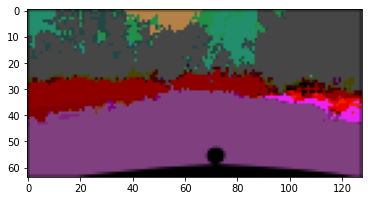

In [33]:
temp = rf_pred[0].reshape((64,128,4))
import matplotlib.pyplot as plt 
plt.imshow(temp)

In [0]:
rf_pred[0]

array([0., 0., 0., ..., 0., 0., 0.])

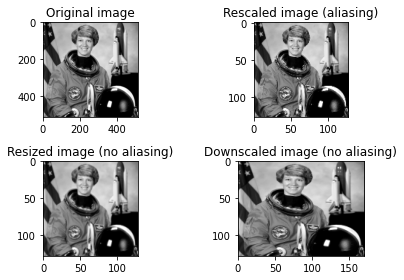

In [11]:
import matplotlib.pyplot as plt
im = y_train[1].reshape(1024,2048)

im


Original Dimensions :  (1024, 2048, 3)
Resized Dimensions :  (128, 256, 3)


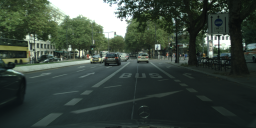

In [58]:
import cv2
from google.colab.patches import cv2_imshow
image_path = "leftImg8bit_trainvaltest/test/berlin/" + "berlin_000000_000019_leftImg8bit.png"
#image = imageio.imread(image_path)
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 12.5 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2_imshow(resized)

In [0]:
import tensorflow as tf

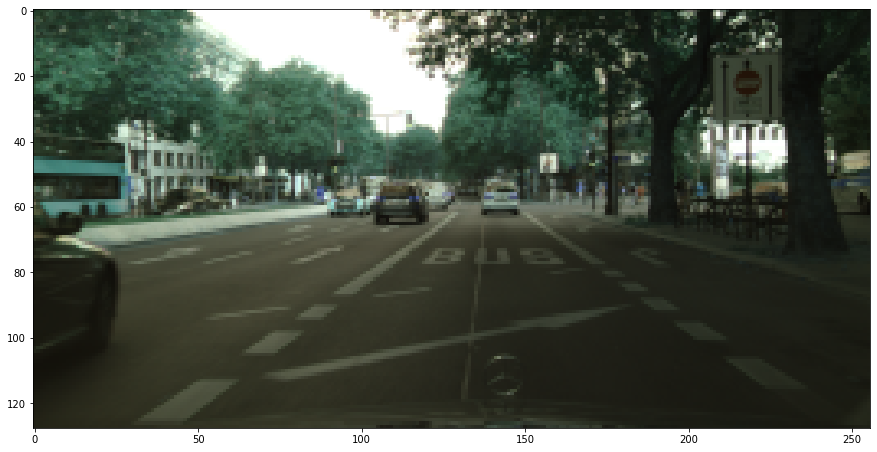

In [59]:

import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
import imageio

colors = [
        (175,61,193),
        (62,59,245),
        (136,234,6),
        (111,35,113),
        (93,89,197),
        (58,32,67),
        (36,155,246),
        (16,176,94),
        (178,161,268),
        (33,113,151),
        (186,114,179),
        (226,25,187),
        (49,115,30),
        (135,41,83),
        ]

cluster_size = 5

    
    #image = imageio.imread("ad.png")
image = resized
plt.figure(figsize = (15,8))
plt.imshow(image)
    
l,b,h = image.shape
image_2d = image.reshape(l*b, h)
image_2d.shape
    
kmeans = cluster.KMeans(n_clusters=cluster_size)
kmeans.fit(image_2d)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
labels = labels.reshape(l,b)
    
kmean_clusters =  centers[labels]
kmean_clusters = np.asarray(kmean_clusters, dtype=int)
    
    





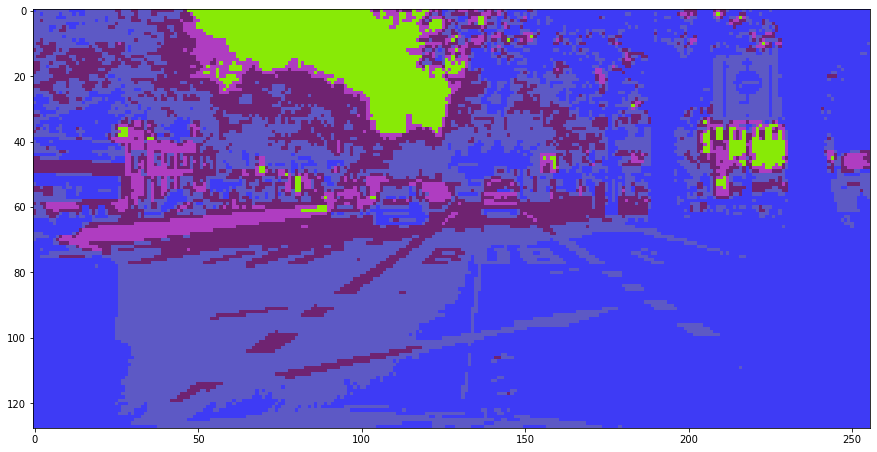

In [60]:
    
for i in range(labels.shape[0]):
  for j in range(labels.shape[1]):
        kmean_clusters[i][j] = colors[labels[i][j]]
    
#final = kmean_clusters.reshape(l, b, h)
#final_int = np.asarray(final, dtype=int)
plt.figure(figsize = (15,8))
    
plt.imshow(kmean_clusters)

In [44]:
kmean_clusters.shape

(64, 128, 3)

In [45]:
labels.shape

(64, 128)